### Task 1. Computing AND operator neural network


Let’s assume that we have two inputs X1 and X2 which produce an output Y. The goal of this
task will be to implement AND operator (AND gate) that has properties as outlined in Table 1.


Table 1. AND operator

| X₁ | X₂ | Y |
|---|---|---|
| 0  | 0  | 0  |
| 0  | 1  | 0  |
| 1  | 0  | 0  |
| 1  | 1  | 1  |

As Table 1 shows, only when both X1 and X2 have a value of 1, the value of Y should be 1. In all
other cases, Y is 0.



The neural network configuration for this assignment will be as follows:

- One input layer with two neurons.
  
- One output layer with one neuron.
  
- The activation function for the output layer will be Sigmoid function. As a results, this means that i) Y=0 if the output layer produces a value lower than 0.5 and ii) Y=1 if the output layer produces a value greater of equal to 0.5

- Initial values for weights will be equal to 1 (w=1) for all input parameters.


- Learning rate is 0.5 (Λ = 0.5)


Using the perceptron learning algorithm, learn the network configuration – i.e., bias and
weights for X1 and X2 - for the given neural network.


What is the accuracy of your model?


### Task 2. Implementing a neural network

we can solve AND and OR gates using a perceptron. But XOR is not possible, simply because this is not a linearly separable problem. Therefore, we will follow a tutorial provided here http://theshybulb.com/2017/09/27/xor-neural-network.html to implement a neural network in Python, with a an input layer with two parameters, one hidden layer, and one output layer.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

We will use a sigmoid function as an activation function for the hidden layer. As we want the output to be 0 or 1, we have no other option but to use the sigmoid function again.


In [2]:
def sigmoid(z):
 return 1 / (1 + np.exp(-z))

Initializing parameters (weights and bias) is an extremely important step. Similar to what was proposed in the example referenced above, we will also assign random values between 0 and 1 for the weights, while biases will be set to 0.

In [3]:
def initialize_parameters(n_x, n_h, n_y):
 """
 Argument:
 n_x -- size of the input layer
 n_h -- size of the hidden layer
 n_y -- size of the output layer
 Returns:
 parameters -- python dictionary containing your parameters:
 W1 -- weight matrix of shape (n_h, n_x)
 b1 -- bias vector of shape (n_h, 1)
 W2 -- weight matrix of shape (n_y, n_h)
 b2 -- bias vector of shape (n_y, 1)
 """
 np.random.seed(1)
 W1 = np.random.randn(n_h, n_x)
 b1 = np.zeros((n_h, 1))
 W2 = np.random.randn(n_y, n_h)
 b2 = np.zeros((n_y, 1))
 parameters = {"W1" : W1, "b1": b1,
 "W2" : W2, "b2": b2}
 return parameters

Forward propagation should be rather straightforward, and this is something we discussed in class.

In [4]:
def forward_propagation(X, Y, parameters):
 m = X.shape[1] # number of samples
 W1 = parameters["W1"] # weight matrix of shape (n_h, n_x)
 W2 = parameters["W2"] # weight matrix of shape (n_y, n_h)
 b1 = parameters["b1"] # bias vector of shape (n_h, 1)
 b2 = parameters["b2"]  # bias vector of shape (n_y, 1)
 Z1 = np.dot(W1, X) + b1 # Z1 = W1*X + b1
 A1 = sigmoid(Z1) # A1 = sigmoid(Z1)
 Z2 = np.dot(W2, A1) + b2 # Z2 = W2*A1 + b2
 A2 = sigmoid(Z2) # A2 = sigmoid(Z2)
 cache = (Z1, A1, W1, b1, Z2, A2, W2, b2) # cache for backpropagation
 logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1
- Y)) # compute cost
 cost = -np.sum(logprobs) / m # compute cost
 return cost, cache, A2 # return cost, cache and A2


We also need to implement the backpropagation part, as we have one hidden layer.

In [7]:
def backward_propagation(X, Y, cache): # backward propagation
 m = X.shape[1] # initialize number of samples, m is number of samples
 (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache # unpack cache, Contains forward propagation intermediate values, useful for backward computation
 # Second Layer Gradient Computations (Output Layer):
 dZ2 = A2 - Y  # This is the gradient of the loss with respect to Z2. It represents how much the output (A2) differs from the actual value (Y). In simple terms, it's the error of the output
 dW2 = np.dot(dZ2, A1.T) / m  # Gradient of the loss with respect to W2. It indicates how much we need to adjust W2 to minimize the error
 db2 = np.sum(dZ2, axis = 1, keepdims=True) / m #  Gradient of the loss with respect to b2. It indicates how much we need to adjust b2 to minimize the error

# First Layer Gradient Computations:
 dA1 = np.dot(W2.T, dZ2)  # Gradient of the loss with respect to A1.
 dZ1 = np.multiply(dA1, A1 * (1- A1)) #  Gradient of the loss with respect to Z1. The term A1 * (1- A1) implies that the activation function used in layer 1 is the sigmoid 
 dW1 = np.dot(dZ1, X.T) / m # Gradient of the loss with respect to W1. It indicates how much we need to adjust W1 to minimize the error
 db1 = np.sum(dZ1, axis=1, keepdims=True) / m # Gradient of the loss with respect to b1. It indicates how much we need to adjust b1 to minimize the error


# Store Gradients
 gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
 "dZ1": dZ1, "dW1": dW1, "db1": db1}
 return gradients

Finally, we need to update weights

In [8]:
def update_parameters(parameters, grads, learning_rate):
 parameters["W1"] = parameters["W1"] - learning_rate * grads["dW1"]
 parameters["W2"] = parameters["W2"] - learning_rate * grads["dW2"]
 parameters["b1"] = parameters["b1"] - learning_rate * grads["db1"]
 parameters["b2"] = parameters["b2"] - learning_rate * grads["db2"]
 return parameter

If we want to learn the XOR table and evaluate the performance of our model, we would have
something along those lines.

Initialize Parameters:

In [10]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters


Forward Propagation:

Note: I'm assuming sigmoid activation for both layers; you can change as per your original design.

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(X, Y, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = -np.sum(logprobs) / Y.shape[1]

    return cost, cache, A2


In [12]:
def update_parameters(parameters, grads, learning_rate):
    parameters["W1"] = parameters["W1"] - learning_rate * grads["dW1"]
    parameters["W2"] = parameters["W2"] - learning_rate * grads["dW2"]
    parameters["b1"] = parameters["b1"] - learning_rate * grads["db1"]
    parameters["b2"] = parameters["b2"] - learning_rate * grads["db2"]
    
    return parameters  # Corrected this line


[[0.49999564 0.4999913  0.50000868 0.50000434]]
[[0. 0. 1. 1.]]


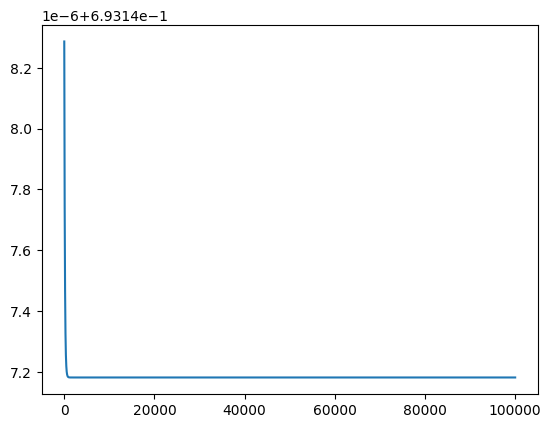

In [13]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]]) # XOR
n_h = 2
n_x = X.shape[0]
n_y = Y.shape[0]
parameters = initialize_parameters(n_x, n_h, n_y)
num_iterations = 100000
learning_rate = 0.01
losses = np.zeros((num_iterations, 1))
for i in range(num_iterations):
 losses[i, 0], cache, A2 = forward_propagation(X, Y, parameters)
 grads = backward_propagation(X, Y, cache)
 parameters = update_parameters(parameters, grads, learning_rate)
cost, _, A2 = forward_propagation(X, Y, parameters)
pred = (A2 > 0.5) * 1.0
print(A2)
print(pred)
plt.figure()
plt.plot(losses)
plt.show()


Now, you can use these functions with the code you provided to train the model and visualize the losses.



**Key Observations**:

1. **Sharp Decrease at the Beginning**: The loss starts at a high value and experiences a sharp decline in the initial iterations. This indicates that the model is rapidly learning to fit the data in the beginning stages of the training.

2. **Plateau after the Decrease**: After the rapid decline, the loss value seems to stabilize and doesn't change much. This plateau suggests that the model has reached a point where further training doesn't significantly reduce the loss value. It might have found an optimal or near-optimal set of parameters (weights and biases) for the given learning rate and architecture.

**Interpretation**:

1. **Model's Learning**: The sharp initial decrease indicates the model's ability to learn from the data. As the model updates its parameters (weights and biases), it becomes better at its task, leading to a reduction in the error (loss).

2. **Convergence**: The plateauing of the loss suggests that the model has converged, meaning it has reached a point where further training doesn't lead to significant improvements. This can be due to various reasons:
   - The model has reached its capacity in learning the given data with the current architecture.
   - The learning rate might be too high for fine-tuning, causing it to oscillate around a minimum value without significantly reducing the loss.
   - The model might have reached a local minimum in the loss surface.

**Recommendations**:

1. **Evaluation**: It's essential to evaluate the model on a separate validation or test set to ensure that it's not just memorizing the training data (overfitting). If the model performs well on unseen data, it indicates good generalization.

2. **Hyperparameter Tuning**: If you're not satisfied with the performance, consider experimenting with hyperparameters like the learning rate, the number of hidden units, or the activation functions. 

3. **Early Stopping**: Since the loss stabilizes after a certain number of iterations, you could employ early stopping. This means you can halt the training once the loss stops decreasing (or decreases very slowly) to save computational resources and time.

In summary, this graph shows the typical behavior of a model that's learning and then converging. The next steps would involve evaluating its predictions on unseen data and potentially tuning it further for better performance.